<a href="https://colab.research.google.com/github/Abhishek-yd/TSF-task3/blob/main/TSF_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem:**
---
For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically.The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.


**Load the Dataset**
---


In [1]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris (3).csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from sklearn.model_selection import train_test_split

import io

ir = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))


In [3]:
ir.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
ir.drop('Id', axis=1, inplace=True)

In [5]:
ir

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
ir.rename(columns={'SepalLengthCm':'SepalLength(cm)','SepalWidthCm':'SepalWidth(cm)','PetalWidthCm':'PetalWidth(cm)','PetalLengthCm':'PetalLength(cm)'},inplace=True)

In [7]:
ir

,SepalLength(cm),SepalWidth(cm),PetalLength(cm),PetalWidth(cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**FacetGrid Plot**
---


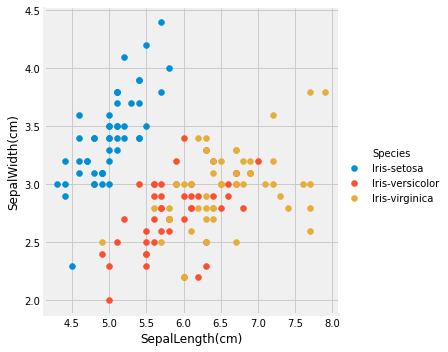

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.FacetGrid(ir,hue='Species',size=5)\
.map(plt.scatter,'SepalLength(cm)','SepalWidth(cm)')\
.add_legend()

**Pair Plot**
---
 A “pairs plot” is also known as a scatterplot, in which one variable in the same data row is matched with another variable's value, like this: Pairs plots are just elaborations on this, showing all variables paired with all the other variables.



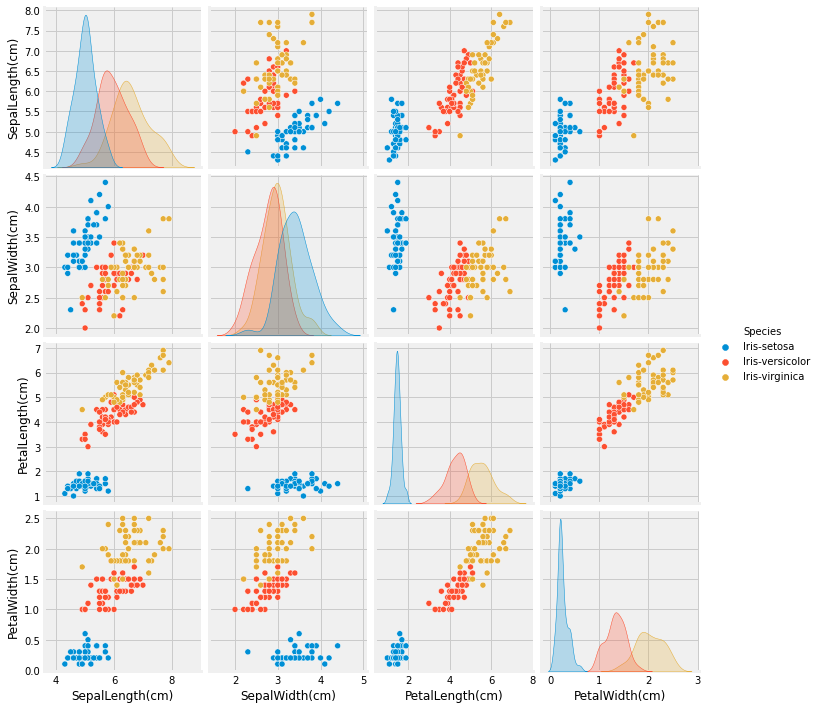

In [9]:
sns.pairplot(ir,hue='Species')

**Splitting Data into Training and Test Sets**
---
The code below puts 75% of the data into a training set and rest 25% of the data into a test set.




In [10]:
X=ir.drop(['Species'],axis=1)
Y=ir['Species']

In [11]:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [12]:
X_train

,SepalLength(cm),SepalWidth(cm),PetalLength(cm),PetalWidth(cm)
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


**Define the Decision Tree Algorithm**
---

In [13]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)

In [14]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [15]:
# Predict for 1 observation
clf.predict(X_test.iloc[0].values.reshape(1, -1))
# Predict for multiple observations
clf.predict(X_test[0:10])

**Measuring Model Performance**
---

In [16]:
# The score method returns the accuracy of the model
score = clf.score(X_test, Y_test)
print(score)

0.9111111111111111


**Tuning the Depth of a Tree**
---

In [17]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    accuracy.append(score)

In [18]:
print(score*100)

97.77777777777777


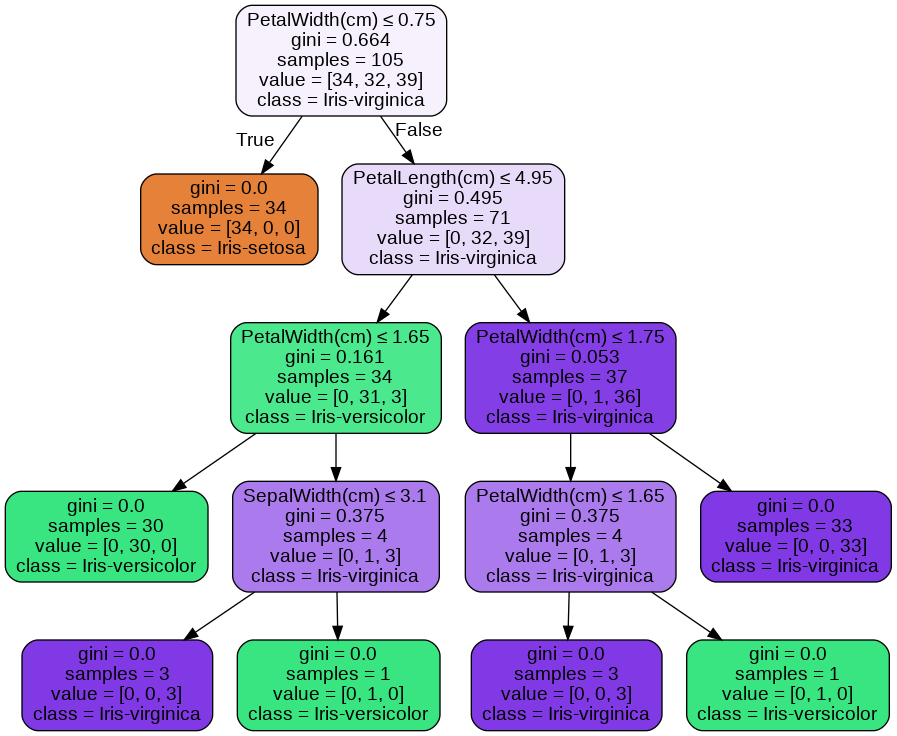

In [19]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=ir.drop(['Species'],axis=1).keys(),
                class_names=ir['Species'].unique(),
                filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Testing Model**
--
Predict result on custom values


In [20]:
Category=['Iris-Setosa','Iris-Versicolor','Iris-Virginica']

In [22]:
X_clf=np.array([[1 ,3.1, 1, 2]])
X_clf_prediction=clf.predict(X_clf)

In [23]:
X_clf_prediction[0]
print(X_clf_prediction[0])

Iris-virginica
